In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../working-csvs/mfdff.csv', index_col=0)

In [3]:
len(df['lname'].unique())

65

In [4]:
df.groupby('region')['lname'].nunique()

region
Atlanta           4
Boston            3
Chicago           3
Cleveland         3
Dallas            3
Kansas City       2
Minneapolis       3
New York          3
Philadelphia      4
Richmond          2
San Francisco     3
St. Louis         3
governor         27
Name: lname, dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date_x'])
df['year'] = df['date'].dt.year

In [6]:
df[(df['female'] == True) & (df['year'] < 2005) & (df['year'] > 1998)].groupby(['year', 'lname'])['lname'].agg('count')

year  lname   
1999  minehan     13
      rivlin       5
2000  minehan     14
2001  bies         1
      minehan     13
2002  bies        12
      minehan     13
2003  bies        11
      minehan     13
      pianalto     9
2004  bies        10
      minehan     14
      pianalto    11
      yellen       7
Name: lname, dtype: int64

In [8]:
df.columns

Index(['date_x', 'section', 'lname', 'svect', 'voter', 'sent', 'region',
       'female', 'chair', 'exp', 'Econ_PhD', 'exp_tertile', 'expd',
       'date_section_mean', 'date_section_std', 'norm_svect', 'temp_svect',
       'total_expd', 'num_expd', 'avg_expd', 'diff_exp_norm', 'use', 'date',
       'year'],
      dtype='object')

/tmp/ipykernel_31416/243385767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_fem['date'] = pd.to_datetime(gdf_fem['date_x'])
/tmp/ipykernel_31416/243385767.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_fem['prop_fem'] = gdf_fem['count'] / gdf_fem['total']


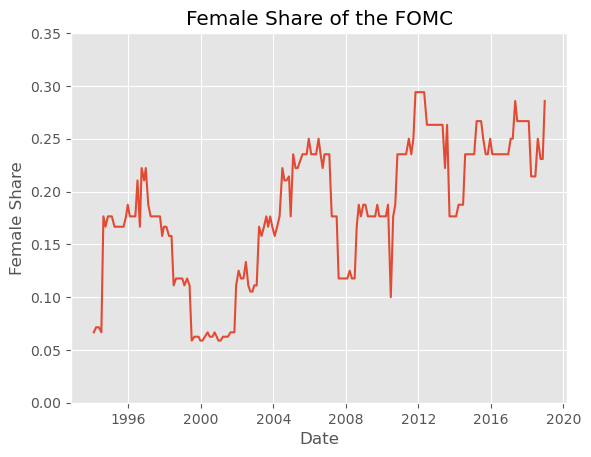

In [9]:
gdf = df.loc[df['section'] == 1, ['date_x', 'female', 'lname']].groupby(['date_x', 'female']).agg(count=('lname', 'count')).reset_index()
# pivoted = gdf.pivot(index='date_x', columns='female', values='count').reset_index()
plt.style.use('ggplot')
# pivoted
gdf['total'] = gdf.groupby('date_x')['count'].transform('sum')
gdf_fem = gdf[gdf['female'] == 1]
gdf_fem['date'] = pd.to_datetime(gdf_fem['date_x'])
gdf_fem['prop_fem'] = gdf_fem['count'] / gdf_fem['total']

fig, ax = plt.subplots()
ax.set_ylim([0,0.35])
ax.set_title('Female Share of the FOMC')
ax.set_ylabel('Female Share')
ax.set_xlabel('Date')
ax.plot(gdf_fem['date'], gdf_fem['prop_fem'])

plt.savefig('../figures/femshare.png')

In [10]:
expdf = df.groupby('date_x', as_index=False).agg({'exp': ['min', 'max', 'median']})
expdf.columns = ["_".join(col_name).rstrip("_") for col_name in expdf.columns]

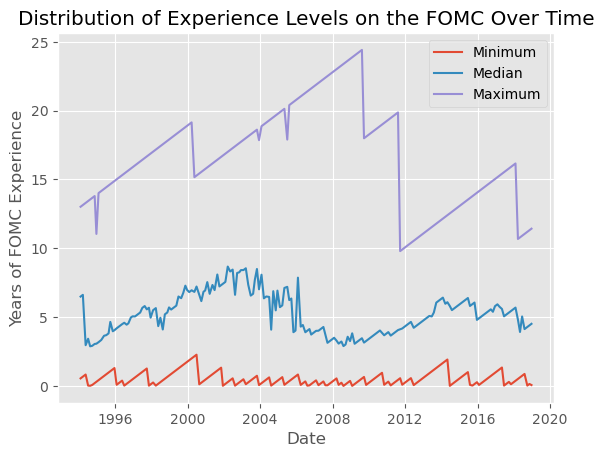

In [11]:
expdf
fig, ax = plt.subplots()
expdf['date'] = pd.to_datetime(expdf['date_x'])
ax.plot(expdf['date'], expdf['exp_min'], label='Minimum')
ax.plot(expdf['date'], expdf['exp_median'], label='Median')
ax.plot(expdf['date'], expdf['exp_max'], label='Maximum')

ax.set_ylabel('Years of FOMC Experience')
ax.set_xlabel('Date')

ax.set_title('Distribution of Experience Levels on the FOMC Over Time')

ax.legend()

plt.savefig('../figures/experience_dist.png')

In [32]:
ephd_share = df.groupby(['date', 'lname'])['Econ_PhD'].max().reset_index().groupby('date')['Econ_PhD'].agg(['count', 'sum']).reset_index()

In [33]:
ephd_share['prop'] = ephd_share['sum'] / ephd_share['count']

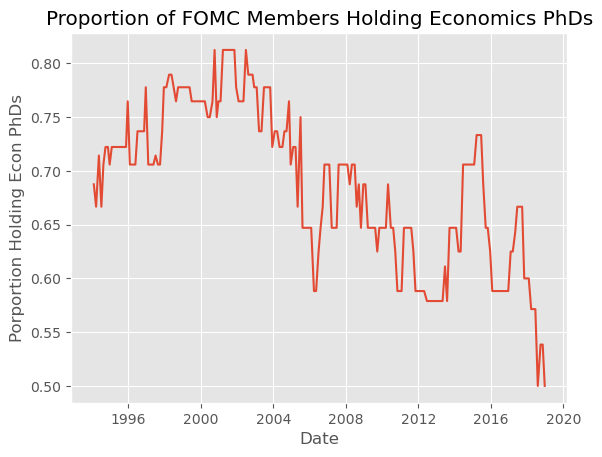

In [36]:
fig, ax = plt.subplots()
ax.plot(ephd_share['date'], ephd_share['prop'])
ax.set_ylabel('Porportion Holding Econ PhDs')
ax.set_xlabel('Date')

ax.set_title('Proportion of FOMC Members Holding Economics PhDs')
plt.savefig('../figures/phdshare.png')